In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import NearestNeighbors

import plotly.figure_factory as ff



In [25]:
df = pd.read_csv(r'../data/to_vis.csv')

data= pd.read_csv(r'../data/H2.csv')

In [26]:
metric_features = ['ADR', 'BookingChanges',
                'DaysInWaitingList', 'LeadTime', 'PreviousBookingsNotCanceled',
                'PreviousCancellations', 'StaysInWeekendNights',
                'StaysInWeekNights', 'TotalOfSpecialRequests','PreviousCancellationRate']
non_metric_features = ['ArrivalDate','ArrivalDateWeekNumber',  'AssignedRoomType', 'Country', 'CustomerType', 'DepositType',
                    'DistributionChannel', 'IsRepeatedGuest' , 'MarketSegment', 'Meal', 'ReservationStatus',
                    'ReservationStatusDate', 'ReservedRoomType', 'Adults', 'Babies','Children', 'RequiredCarParkingSpaces']

In [27]:
df[metric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
ADR,53422.0,110.993917,48.057274,0.0,84.0,105.3,134.0,5400.0
BookingChanges,53422.0,0.246397,0.704098,0.0,0.0,0.0,0.0,21.0
DaysInWaitingList,53422.0,1.020347,11.902366,0.0,0.0,0.0,0.0,391.0
LeadTime,53422.0,77.683539,82.113124,0.0,14.0,50.0,118.0,629.0
PreviousBookingsNotCanceled,53422.0,0.191513,2.038911,0.0,0.0,0.0,0.0,72.0
PreviousCancellations,53422.0,0.035772,0.372805,0.0,0.0,0.0,0.0,21.0
StaysInWeekendNights,53422.0,0.872131,0.913671,0.0,0.0,1.0,2.0,16.0
StaysInWeekNights,53422.0,2.274363,1.618217,0.0,1.0,2.0,3.0,41.0
TotalOfSpecialRequests,53422.0,0.711055,0.833557,0.0,0.0,1.0,1.0,5.0
PreviousCancellationRate,53422.0,0.015920,0.120856,0.0,0.0,0.0,0.0,1.0


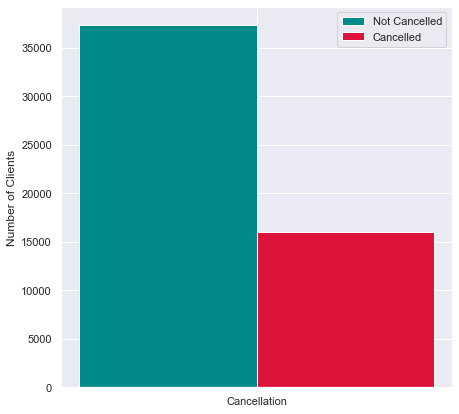

In [85]:
fig, ax = plt.subplots(figsize=(7,7))
X = ['Cancellation']
yes_canc = [df[df.IsCanceled == 0]['ADR'].count()]
no_canc = [df[df.IsCanceled == 1]['ADR'].count()]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, yes_canc, 0.4, label = 'Not Cancelled', color='darkcyan')
plt.bar(X_axis + 0.2, no_canc, 0.4, label = 'Cancelled', color='crimson')
  
plt.xticks(X_axis, X)
plt.ylabel("Number of Clients")
plt.legend()
plt.show()

plt.show()

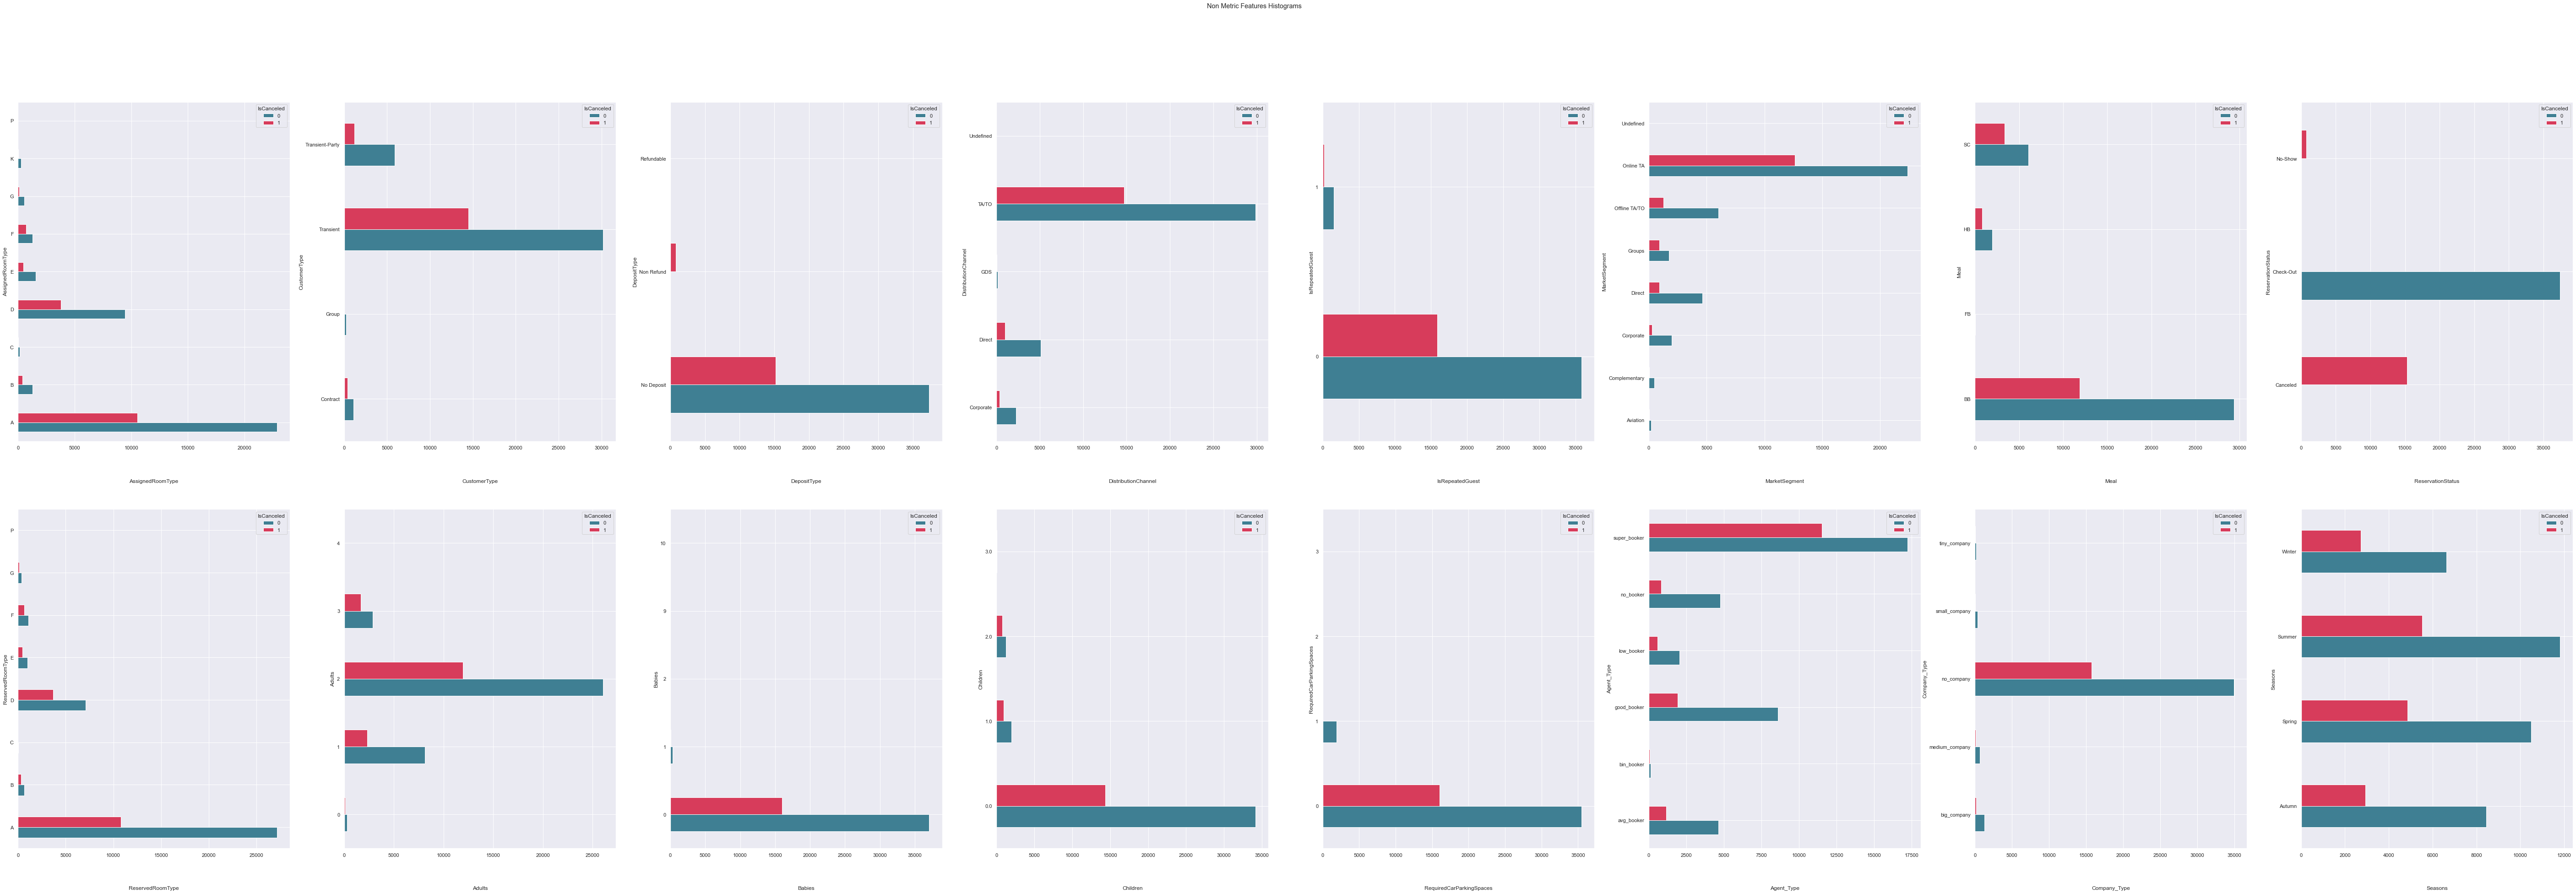

In [28]:
# Non Metric Features Histograms except dates
nmtplotft = ['AssignedRoomType', 'CustomerType', 'DepositType',
                    'DistributionChannel', 'IsRepeatedGuest' , 'MarketSegment', 'Meal', 'ReservationStatus'
                    , 'ReservedRoomType', 'Adults', 'Babies','Children', 'RequiredCarParkingSpaces', 'Agent_Type', 'Company_Type','Seasons']
sns.set()
fig, axes = plt.subplots(2, ceil(len(nmtplotft) / 2), figsize=(100, 30))

for ax, feat in zip(axes.flatten(), nmtplotft):
    df.groupby(['IsCanceled',feat]).size().unstack(0).plot.barh(ax=ax, colormap=sns.diverging_palette(220, 5, as_cmap=True))
    ax.set_title(feat, y=-0.13)
    
title = "Non Metric Features Histograms"

plt.suptitle(title)

plt.show()

<AxesSubplot:xlabel='ArrivalDate,ArrivalDate'>

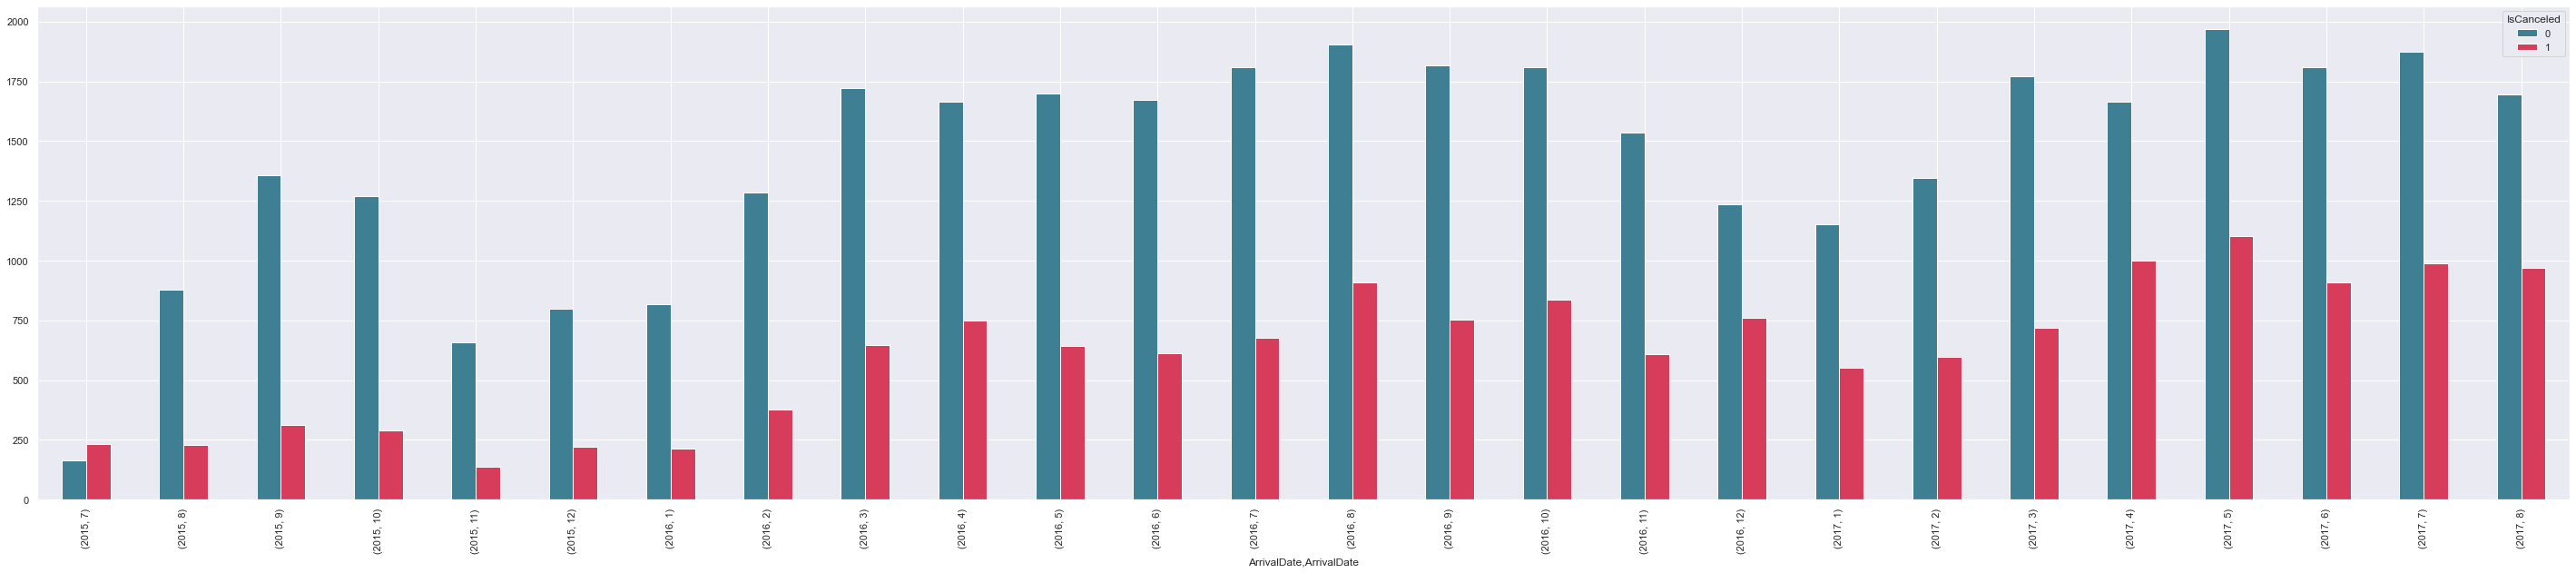

In [29]:
fig, ax = plt.subplots(figsize=(50,10))
df.groupby([df.IsCanceled,
pd.DatetimeIndex(df['ArrivalDate']).year,
pd.DatetimeIndex(df['ArrivalDate']).month]
).size().unstack(0).plot.bar(ax=ax, legend = True, colormap=sns.diverging_palette(220, 5, as_cmap=True))

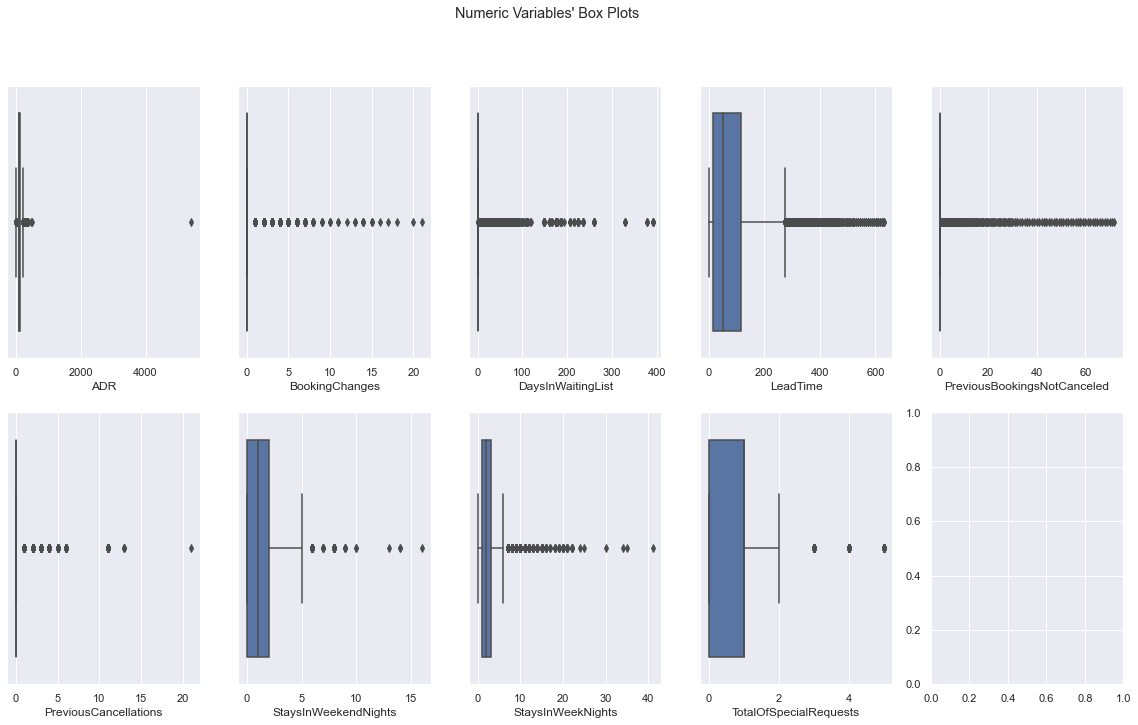

In [ ]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(x=df[feat], ax=ax)

# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

Number of Reservations per month 

In [ ]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

data.groupby('ArrivalDateMonth').size().sort_values().reindex(new_order, axis=0)

ArrivalDateMonth
January      3736
February     4965
March        6458
April        7480
May          8232
June         7894
July         8088
August       8983
September    7400
October      7605
November     4357
December     4132
dtype: int64

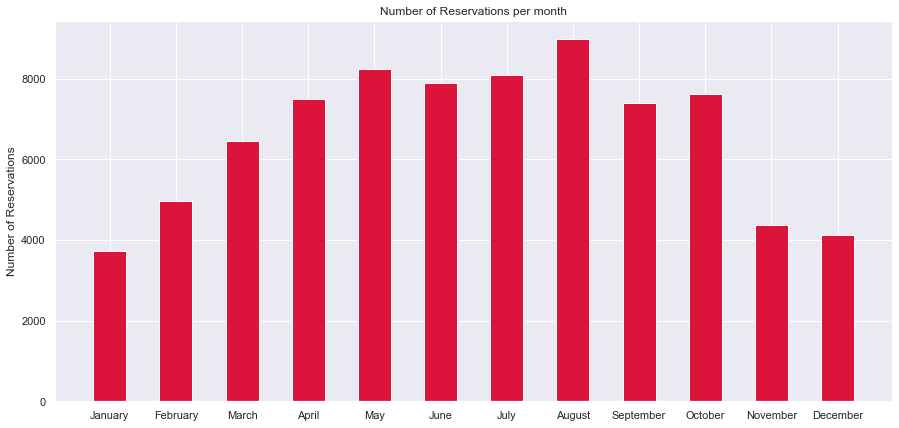

In [86]:

months = new_order
reservations= list(data.groupby('ArrivalDateMonth').size().sort_values().reindex(new_order, axis=0))
  
fig = plt.figure(figsize = (15, 7))
 
# creating the bar plot
plt.bar(months, reservations, color ='crimson',
        width = 0.5)
 
plt.ylabel("Number of Reservations")
plt.title("Number of Reservations per month")
plt.show()


Number of cancelations per month

<AxesSubplot:xlabel='Months'>

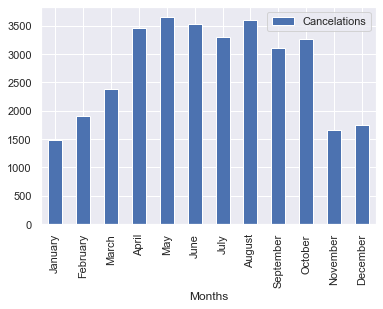

In [ ]:
lista= list(data.groupby(['ArrivalDateMonth', 'IsCanceled']).size())
indices= [i for i in range(len(lista)) if i % 2 == 1]
cancelations =[]
for i,v in enumerate(lista):
    for value in indices:
        if i == value:
            cancelations.append(v)


wrong_order = sorted (new_order)
l = [wrong_order,cancelations]

d = pd.DataFrame (l).transpose()
d.columns = ['Months', 'Cancelations']

d.set_index('Months', inplace =True)

d.reindex(new_order).plot.bar()

    

	Average Daily Rate per Month and per Year

In [ ]:
data.groupby(['ArrivalDateMonth', 'ArrivalDateYear'])['ADR'].mean()

ArrivalDateMonth  ArrivalDateYear
April             2016                99.549705
                  2017               121.884983
August            2015                77.729198
                  2016               118.917943
                  2017               139.424419
December          2015                81.108162
                  2016                93.977966
February          2016                79.976782
                  2017                89.760351
January           2016                76.327383
                  2017                86.252673
July              2015                69.819170
                  2016               111.690699
                  2017               125.964645
June              2016               108.887571
                  2017               129.137978
March             2016                91.900640
                  2017                93.305947
May               2016               108.639984
                  2017               132.126438
Novemb

<AxesSubplot:xlabel='ArrivalDate'>

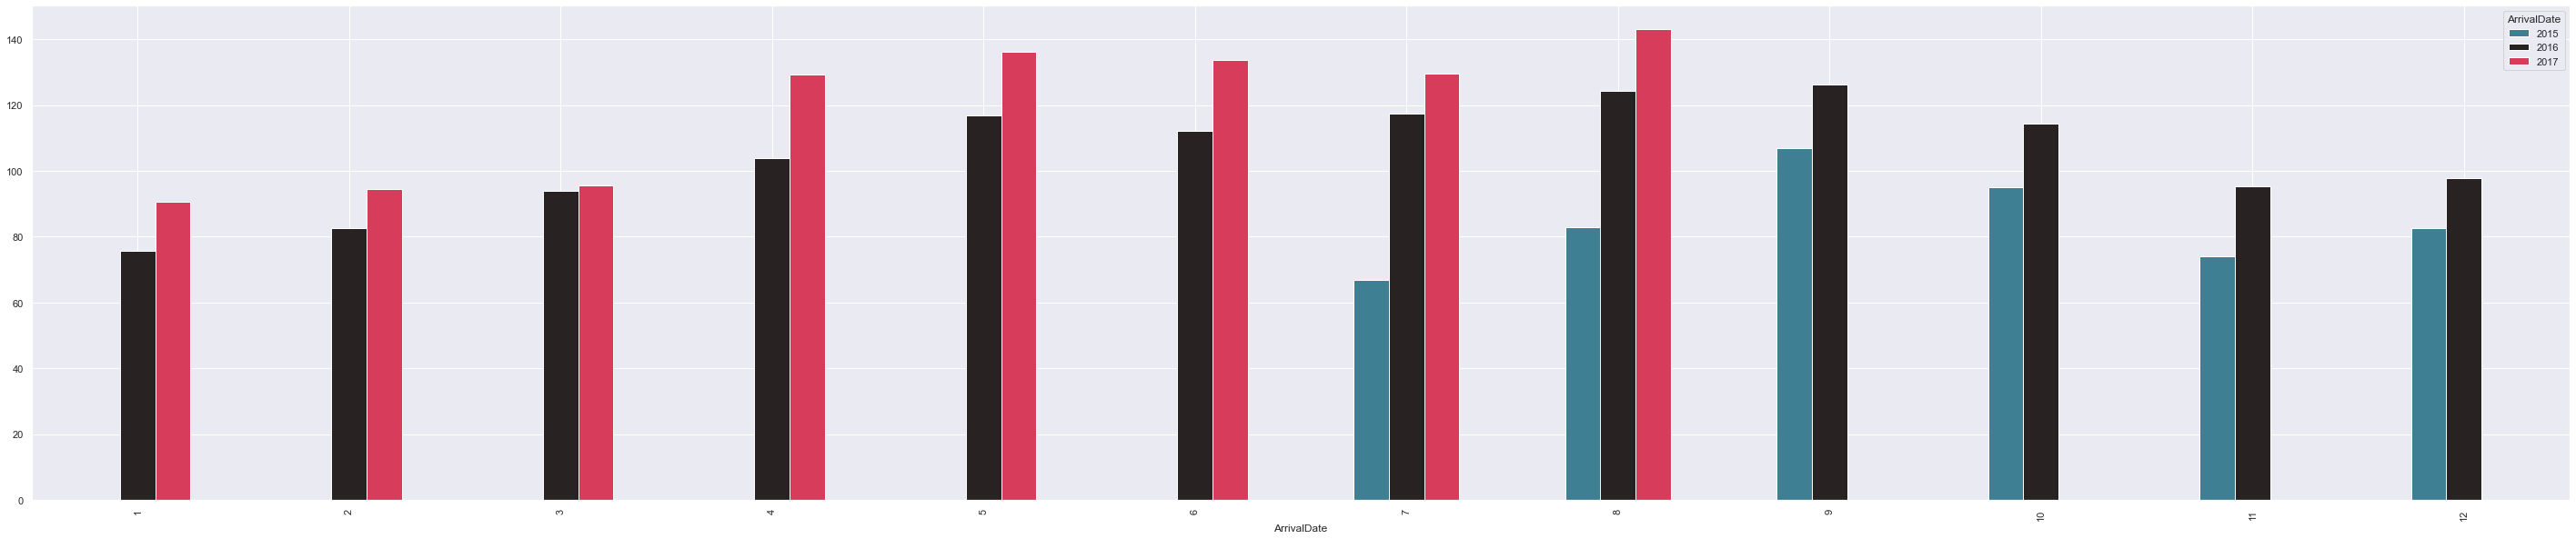

In [57]:
fig, ax = plt.subplots(figsize=(50,10))
df.groupby([pd.DatetimeIndex(df['ArrivalDate']).year,
            pd.DatetimeIndex(df['ArrivalDate']).month]
            )['ADR'].mean().unstack(0).plot.bar(ax=ax, legend = True, colormap=sns.diverging_palette(220, 5, as_cmap=True, center='dark'))